**The Sparks Foundation**

**Task 2**: Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Data Source**:https://drive.google.com/file/d/13jeA91bohajsOoLfrMKQSnoPrJqAu9Cm/view?usp=sharing

**Github link**:https://github.com/SB2507/The-Sparks-Foundation/blob/main/Task02.ipynb

**Clustering**


A process of organizing objects into groups such that data points in the same groups are similar to the data points in the same group. A cluster is a collection of objects where these objects are similar and dissimilar to the other cluster.

**K-Means**

K-Means clustering is a type of unsupervised learning. The main goal of this algorithm to find groups in data and the number of groups is represented by K. It is an iterative procedure where each data point is assigned to one of the K groups based on feature similarity.

**Algorithm**

K-Means algorithm starts with initial estimates of K centroids, which are randomly selected from the dataset. The algorithm iterates between two steps assigning data points and updating Centroids.
 

---------------------------------------------------------**[SURAJ S. BHUTE](https://www.linkedin.com/in/surajbhute/)**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing all libraries required in this notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


## Importing the dataset
Data Source:https://drive.google.com/file/d/13jeA91bohajsOoLfrMKQSnoPrJqAu9Cm/view?usp=sharing

In [3]:
iris_df = pd.read_csv('/content/drive/MyDrive/GRIP/Iris.csv')


In [4]:
iris_df.shape

(150, 6)

In [5]:
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
iris_df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#Statistical summary

In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Fitting the Elbow Method to find the actual number of clusters
One method of choosing value K is the elbow method. In this method we will run K-Means clustering for a range of K values lets say (K= 1 to 10) 

**Train Test Split**

In [9]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values


In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


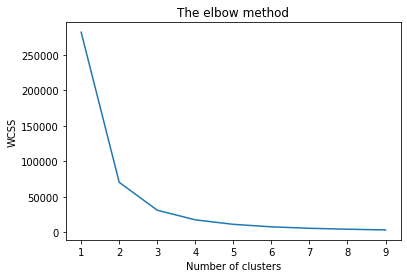

In [11]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**In the Elbow method the number of Cluster prediction is true. So this Technique indiactes a number of Clusters=3**

 ## Model Development with K-Means Clustering

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualising the Clusters

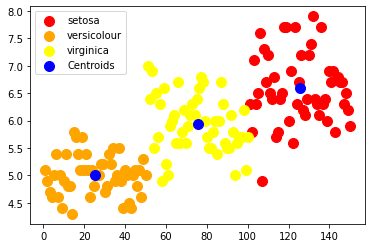

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()

**K-Means with the Elbow method did an amazing job at predicting the number of true Clusters which is 3. The above visualization is the clustered graph.** 
 